# Problems associated with Model evaluation using Holdout

In [1]:
# uncomment to install mlxtend
#! pip install mlxtend 

Since the implicit assumption  is that **training, validation, and test set** are ***sampled from the same distribution***, it is essential to ensure before model design that the distribution of the data is not affected by partitioning your data.  dealing with imbalanced data, e.g. a data set with a binary target which is positive only 10% of the cases. Randomly splitting the data into train/validation/test set according to a 50%/25%/25% split could e.g. lead to a distribution of 5% positive cases in training and 15% in validation & test set, which could affect performance estimate of a model.

In [4]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.data import iris_data
from mlxtend.preprocessing import shuffle_arrays_unison
%matplotlib inline

In [5]:
X, y = iris_data()

X, y = shuffle_arrays_unison([X, y], random_seed=123)
X_train, X_test = X[:100], X[100:150]
y_train, y_test = y[:100], y[100:150]

In [11]:
print("\n[Setosa, Versicolor, Verginica] :")
print(np.bincount(y))
print("\nTraining set [Setosa, Versicolor, Verginica] :")
print(np.bincount(y_train))
print("\nTesting set [Setosa, Versicolor, Verginica] :")
print(np.bincount(y_test))


[Setosa, Versicolor, Verginica] :
[50 50 50]

Training set [Setosa, Versicolor, Verginica] :
[38 28 34]

Testing set [Setosa, Versicolor, Verginica] :
[12 22 16]


Assuming that the Iris dataset is representative of the true population (for instance, assuming thatiris flower species are distributed uniformly in nature),here two imbalanced datasets with non-uniform class distributions has been created. When training set is imbalanced in one hand, even worse the testing set imbalances in opposite direction.In the worst-case scenario, the test set may not contain any instance of a minority class at all

In [12]:
df = pd.DataFrame(X)
df['class'] = y

df_train = pd.DataFrame(X_train)
df_train['class'] = y_train

df_test = pd.DataFrame(X_test)
df_test['class'] = y_test

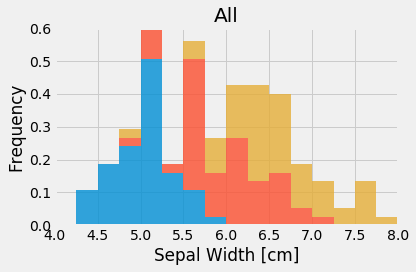

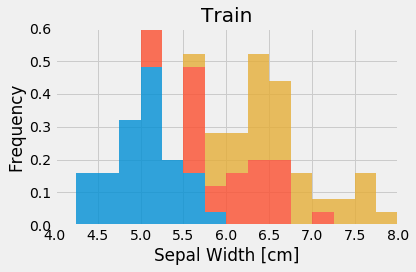

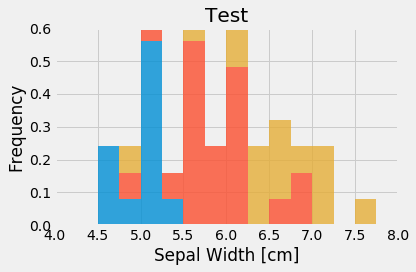

In [13]:
def stackhist(x, y, **kws):
    grouped = pd.DataFrame.groupby(x, y)
    data = [d for _, d in grouped]
    labels = [l for l, _ in grouped]
    plt.hist(data, histtype="barstacked", 
             label=labels, alpha=0.8, density=True,
             bins=np.arange(4.0, 8.1, 0.25))
    plt.ylim([0, 0.6])
    plt.xlim([4, 8])
    plt.xlabel('Sepal Width [cm]')
    plt.ylabel('Frequency')

with plt.style.context('fivethirtyeight'):    
    
    stackhist(df[0], df['class'])
    #plt.legend(['Setosa', 'Virginica', 'Versicolor'], fontsize=12)
    plt.title('All')
    plt.tight_layout()
    plt.savefig('./all.svg')
    plt.show()    

    stackhist(df_train[0], df_train['class'])
    plt.title('Train')
    plt.tight_layout()
    #plt.savefig('./train.svg')
    plt.show()    

    stackhist(df_test[0], df_test['class'])
    plt.title('Test')
    plt.tight_layout()
    #plt.savefig('./test.svg')
    plt.show() 

In such a case, stratification(randomly split a dataset such that each class is correctly represented in the resulting subsets (the training and the test set)) may be a method of choice. ***stratified sampling*** (potentially combined with over-respectively undersampling techniques if the learning method requires it)may be used to maintain the original class proportion in resulting partitions.

*Note*: When dealing with time series data, the task (forecasts), train, validation and test sets have to be selected by ***splitting*** the data ***along the temporal axis***. i.e., the “oldest” data is used for training, the more recent one for validation, and the most recent one for testing. Random sampling does not make sense in this case.

---